# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
#import hyperopt
from catboost import Pool, CatBoostClassifier, cv # for modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns # For data visualization 
import matplotlib.pyplot as plt # For plotting graphs 
%matplotlib inline 
#from dfply import *
import os
import warnings
from pandas.plotting import scatter_matrix

In [2]:
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})

### DATA IMPORTATION

In [3]:
train = pd.read_csv("train_values.csv", low_memory=False)
train_label = pd.read_csv("train_labels.csv", low_memory=False)

In [4]:
train = pd.merge(train, train_label, on='row_id') # Merging the dependent and independent variables together

In [5]:
#### CHECKING THE SHAPE OF THE DATASETS PROVIDED

In [6]:
train.shape

(500000, 23)

We have 500,000 rows and 23 columns(including train labels).

In [7]:
# Viewing the first 10 observations

In [8]:
train.head(10)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1
5,5,1,1,3,1,133.0,3,221,13,55,...,51.0,6078.0,4.821,82745.0,96.550,1827.0,2340.0,964,False,1
6,6,3,1,1,1,240.0,3,374,28,131,...,104.0,6068.0,26.427,65282.0,81.068,1863.0,2560.0,5488,False,1
7,7,2,1,1,1,210.0,3,322,37,35,...,55.0,6030.0,78.153,108353.0,59.439,969.0,1601.0,2442,True,1
8,8,1,1,3,2,209.0,3,24,37,20,...,244.0,5151.0,88.156,63414.0,62.813,411.0,481.0,2118,True,1
9,9,1,1,3,1,197.0,3,194,9,20,...,86.0,7916.0,24.893,65927.0,100.000,1861.0,2123.0,3507,False,0


### Making a  copy of the training and testing dataset.

In [9]:
train_original = train.copy() 
train1 = train

# Understanding the Data

In [10]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [11]:
train.dtypes # Checking the data types of the available data

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

#### Computing the correlation of the numeric features(columns)

In [12]:
num = ['loan_amount', 'applicant_income', 
          'ffiecmedian_family_income','population',
           'minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct',
          'number_of_owner-occupied_units','number_of_1_to_4_family_units']
train[num].corr()

,loan_amount,applicant_income,ffiecmedian_family_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units
loan_amount,1.000000,0.483951,0.105924,0.000100,0.007227,0.105924,0.043811,-0.013660,-0.036644
applicant_income,0.483951,1.000000,0.114988,-0.006948,-0.053795,0.114988,0.102667,0.004541,-0.019748
ffiecmedian_family_income,0.105924,0.114988,1.000000,-0.014377,0.021059,1.000000,-0.054500,-0.021390,-0.148235
population,0.000100,-0.006948,-0.014377,1.000000,0.087383,-0.014377,0.149677,0.858732,0.816952
minority_population_pct,0.007227,-0.053795,0.021059,0.087383,1.000000,0.021059,-0.442800,-0.214410,-0.157976
ffiecmedian_family_income,0.105924,0.114988,1.000000,-0.014377,0.021059,1.000000,-0.054500,-0.021390,-0.148235
tract_to_msa_md_income_pct,0.043811,0.102667,-0.054500,0.149677,-0.442800,-0.054500,1.000000,0.360774,0.210613
number_of_owner-occupied_units,-0.013660,0.004541,-0.021390,0.858732,-0.214410,-0.021390,0.360774,1.000000,0.887591
number_of_1_to_4_family_units,-0.036644,-0.019748,-0.148235,0.816952,-0.157976,-0.148235,0.210613,0.887591,1.000000


### Missing Value and Outliers Treatment

In [13]:
train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

### Percentage of Missing Values

In [14]:
(train.isnull().sum())/500000 *100

row_id                            0.0000
loan_type                         0.0000
property_type                     0.0000
loan_purpose                      0.0000
occupancy                         0.0000
loan_amount                       0.0000
preapproval                       0.0000
msa_md                            0.0000
state_code                        0.0000
county_code                       0.0000
applicant_ethnicity               0.0000
applicant_race                    0.0000
applicant_sex                     0.0000
applicant_income                  7.9896
population                        4.4930
minority_population_pct           4.4932
ffiecmedian_family_income         4.4880
tract_to_msa_md_income_pct        4.5028
number_of_owner-occupied_units    4.5130
number_of_1_to_4_family_units     4.5060
lender                            0.0000
co_applicant                      0.0000
accepted                          0.0000
dtype: float64

There are missing values in applicant_income, population, minority_population_pct, ffiecmedian_family_income, tract_to_msa_md_income_pct, number_of_owner-occupied_units and number_of_1_to_4_family_units features.
With a maximum percentage of 8%.
We will treat the missing values in all the features one by one. 

Also replacing -1 with nas in na's in msa_md, state_code, county_code

### Replacing -1 with na's in msa_md, state_code, county_code

In [15]:
def missing_val(loan):
    loan['msa_md'] = loan['msa_md'].replace(-1, np.nan)
    loan['state_code'] = loan['state_code'].replace(-1, np.nan)
    loan['county_code'] = loan['county_code'].replace(-1, np.nan)
    return loan

### Replacing all nas with 0

In [16]:
train.fillna(0,inplace=True)

In [17]:
train.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

# Data Cleaning and Manipulation

In [18]:
# Derived Metrics
train['loan_income_ratio']= (train['loan_amount']/train['applicant_income'])

In [19]:
encode = LabelEncoder()
train['co_applicant'] = encode.fit_transform(train['co_applicant'].astype('str'))

# FEATURES ENGINERRING

Converting all the continous numerical features into bins depending on the minum and maximum

### TRAIN

In [20]:
#Income
bins = [0,1500,4000,6000,10139] 
group = ['Low','Average','High', 'Very high'] 
train['Income_bin'] = pd.cut(train['applicant_income'],bins,labels = group)

#loan_amount
bins = [0,1500,4000,6000,1000000] 
group = ['Low','Average','High', 'Very high'] 

train['loan_amount_bin'] = pd.cut(train['loan_amount'],bins,labels=group)

#population 
bins=[0,8000,15000,25000,40000] 
group=['Low','Average','High', 'Very high'] 

train['population_pop_bin']=pd.cut(train['population'],bins,labels=group)

#minority_population_pct
bins=[0,15,30,60,1000] 
group=['Low','Average','High', 'Very high'] 

train['min_pop_bin']=pd.cut(train['minority_population_pct'],bins,labels=group)

#number_of_owner-occupied_units
bins=[0,500, 2000,3500,5000,10000] 
group=['Low','Average','Good','High', 'Very high'] 

train['num_own_bin']=pd.cut(train['number_of_owner-occupied_units'],bins,labels=group)

### TRAIN

In [21]:
def data_manage(loan):    
    loan['preapproval'] = loan['preapproval'].astype('category')
    loan['applicant_race'] = loan['applicant_race'].astype('category')
    loan['applicant_sex'] = loan['applicant_sex'].astype('category')
    loan['loan_purpose'] = loan['loan_purpose'].astype('category')
    loan['occupancy'] = loan['occupancy'].astype('category')
    loan['property_type'] = loan['property_type'].astype('category')
    loan['loan_type'] = loan['loan_type'].astype('category')
    loan['applicant_ethnicity'] = loan['applicant_ethnicity'].astype('category')
    loan['msa_md'] = loan['msa_md'].astype('category')
    loan['state_code'] = loan['state_code'].astype('category')
    loan['county_code'] = loan['county_code'].astype('category')
    loan['accepted'] = loan['accepted'].astype('category')
    ############
    loan['loan_amount_bin'] = loan['loan_amount_bin'].astype('category')
    loan['Income_bin'] = loan['Income_bin'].astype('category')
    loan['population_pop_bin'] = loan['population_pop_bin'].astype('category')
    loan['min_pop_bin'] = loan['min_pop_bin'].astype('category')
    loan['num_own_bin'] = loan['num_own_bin'].astype('category')
    
     # set variable types (numeric)
    
    loan['ffiecmedian_family_income'] = pd.to_numeric(loan['ffiecmedian_family_income'])
    loan['tract_to_msa_md_income_pct'] = pd.to_numeric(loan['tract_to_msa_md_income_pct'])
    loan['number_of_1_to_4_family_units'] = pd.to_numeric(loan['number_of_1_to_4_family_units'])
    loan['loan_income_ratio'] = pd.to_numeric(loan['loan_income_ratio'])
    
    return loan

In [22]:
train = data_manage(train)

In [23]:
train = train.fillna(train.mode().iloc[0])

In [24]:
#train.isnull().sum()

In [25]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,number_of_1_to_4_family_units,lender,co_applicant,accepted,loan_income_ratio,Income_bin,loan_amount_bin,population_pop_bin,min_pop_bin,num_own_bin
0,0,3,1,1,1,70.0,3,18,37,246,...,2642.0,4536,0,1,2.916667,Low,Low,Low,High,Average
1,1,1,1,3,1,178.0,3,369,52,299,...,2108.0,2458,0,0,3.122807,Low,Low,Low,Average,Average
2,2,2,1,3,1,163.0,3,16,10,306,...,1048.0,5710,0,1,2.432836,Low,Low,Low,Very high,Average
3,3,1,1,1,1,155.0,1,305,47,180,...,2299.0,5888,1,1,1.476190,Low,Low,Low,Low,Good
4,4,1,1,1,1,305.0,3,24,37,20,...,1847.0,289,0,1,4.295775,Low,Low,Low,Very high,Average


In [26]:
train = train.drop(['row_id'], axis=1)

In [27]:
y = train.accepted
X = train.drop('accepted',axis=1) # Dropping the deepending variable from the features to be trained


### Univariate Analysis

In this section, we will do univariate analysis. which is the simplest form of analyzing data where we examine each variable individually.

For categorical features, i will use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots will be used to look at the distribution of the variable.

### Target Variable(accepted )

In [28]:
 train1['accepted'].value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

we set Normalize to True to print proportions instead of number

In [29]:
 train1['accepted'].value_counts(normalize = True)

1    0.500228
0    0.499772
Name: accepted, dtype: float64

<AxesSubplot:>

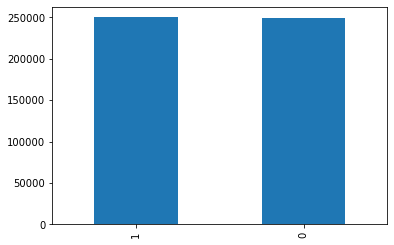

In [30]:
 train1['accepted'].value_counts().plot.bar()

Out of the total loan applied for the year, 250114 (around 50%) was approved and the others was rejected(approximatelty 50%). Which shows that we have a balance data.

### Categorical(Independent Variable)

Visualizing each variable separately.

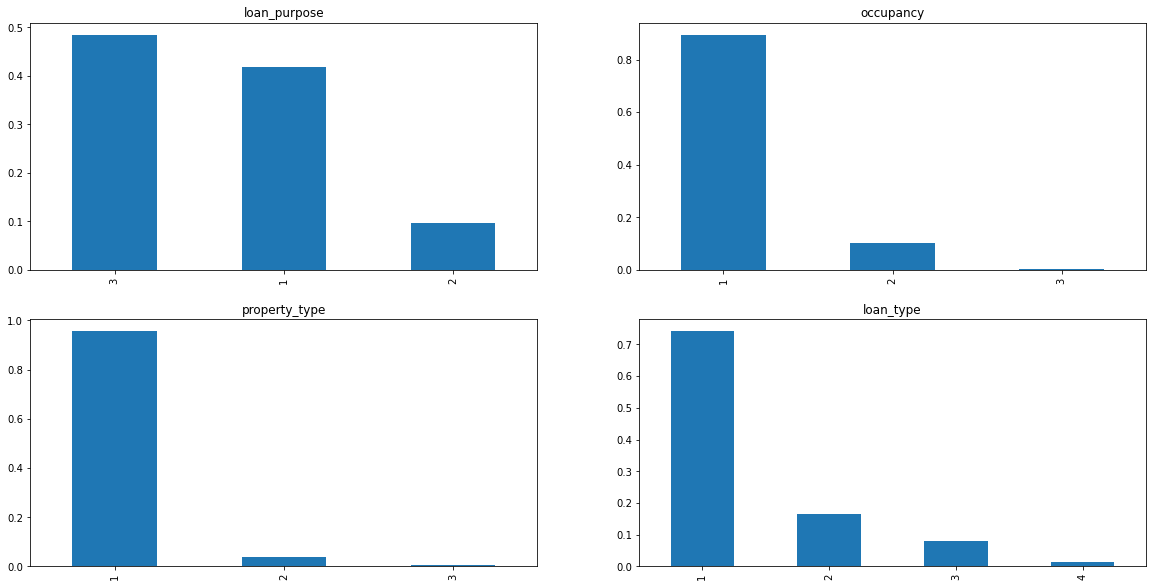

In [31]:
plt.figure(1)
plt.subplot(221)
train1['loan_purpose'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'loan_purpose') 

plt.subplot(222)
train1['occupancy'].value_counts(normalize=True).plot.bar(title= 'occupancy') 

plt.subplot(223) 
train1['property_type'].value_counts(normalize=True).plot.bar(title= 'property_type') 

plt.subplot(224) 
train1['loan_type'].value_counts(normalize=True).plot.bar(title= 'loan_type') 
plt.show()

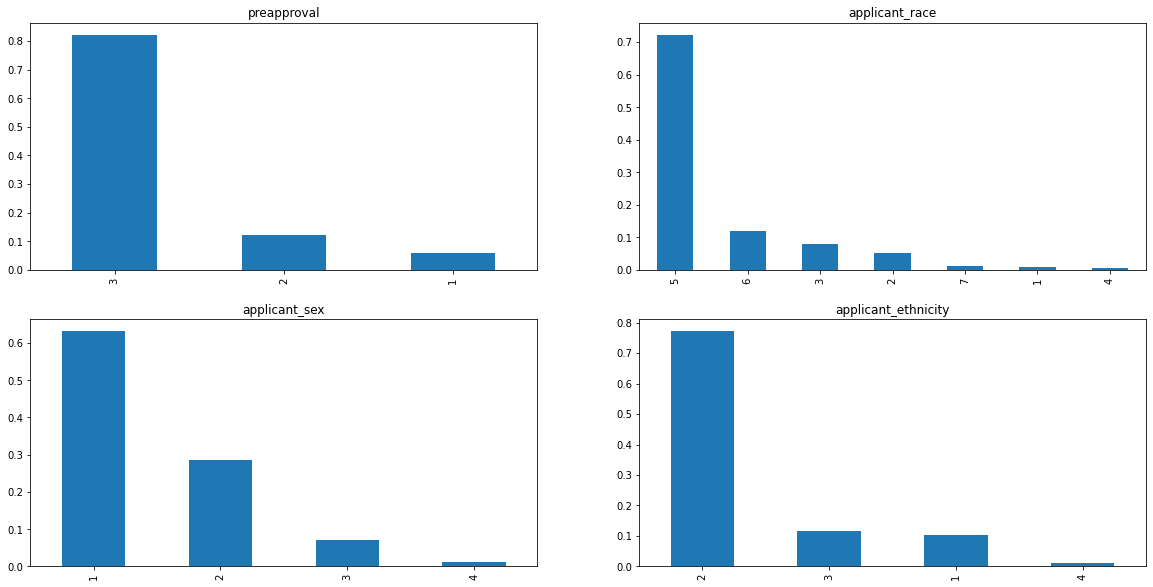

In [32]:
plt.figure(1)
plt.subplot(221)
train1['preapproval'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'preapproval') 

plt.subplot(222)
train1['applicant_race'].value_counts(normalize=True).plot.bar(title= 'applicant_race') 

plt.subplot(223) 
train1['applicant_sex'].value_counts(normalize=True).plot.bar(title= 'applicant_sex') 

plt.subplot(224) 
train1['applicant_ethnicity'].value_counts(normalize=True).plot.bar(title= 'applicant_ethnicity') 
plt.show()

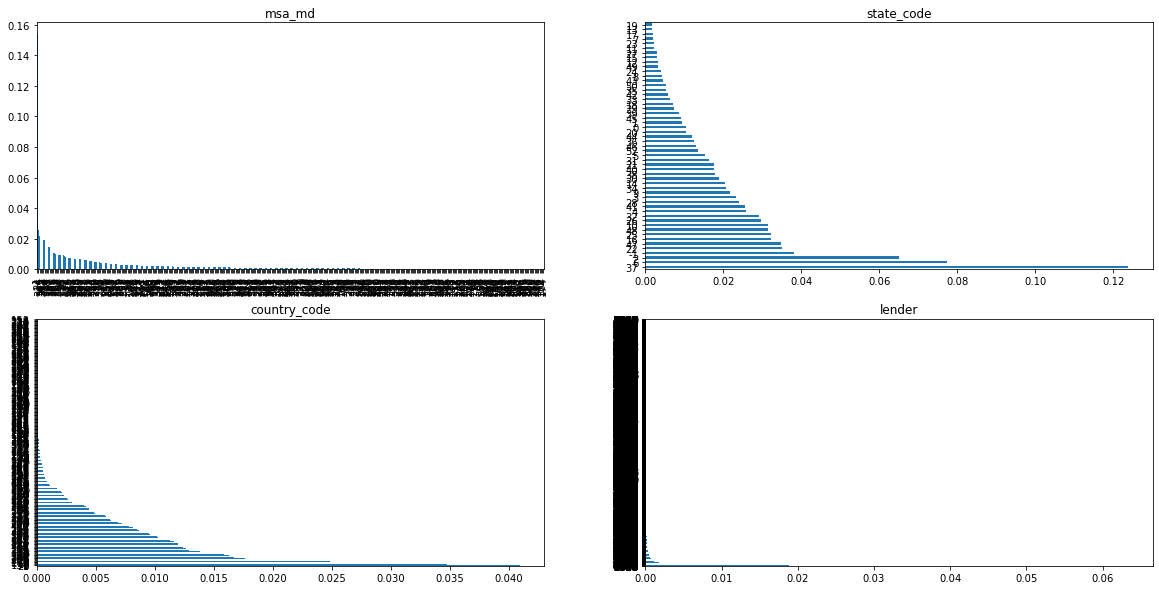

In [33]:
plt.figure(1)
plt.subplot(221)
train1['msa_md'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'msa_md') 

plt.subplot(222)
train1['state_code'].value_counts(normalize=True).plot.barh(title= 'state_code') 

plt.subplot(223) 
train1['county_code'].value_counts(normalize=True).plot.barh(title= 'country_code') 

plt.subplot(224) 
train1['lender'].value_counts(normalize=True).plot.barh(title= 'lender') 
plt.show()

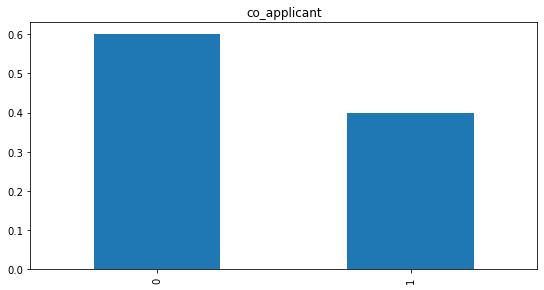

In [34]:
plt.figure(1)
plt.subplot(221)
train1['co_applicant'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'co_applicant') 
plt.show()

### Numerical

In [35]:
train1 = train1.dropna()
train1.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,number_of_1_to_4_family_units,lender,co_applicant,accepted,loan_income_ratio,Income_bin,loan_amount_bin,population_pop_bin,min_pop_bin,num_own_bin
0,0,3,1,1,1,70.0,3,18,37,246,...,2642.0,4536,0,1,2.916667,Low,Low,Low,High,Average
1,1,1,1,3,1,178.0,3,369,52,299,...,2108.0,2458,0,0,3.122807,Low,Low,Low,Average,Average
2,2,2,1,3,1,163.0,3,16,10,306,...,1048.0,5710,0,1,2.432836,Low,Low,Low,Very high,Average
3,3,1,1,1,1,155.0,1,305,47,180,...,2299.0,5888,1,1,1.476190,Low,Low,Low,Low,Good
4,4,1,1,1,1,305.0,3,24,37,20,...,1847.0,289,0,1,4.295775,Low,Low,Low,Very high,Average


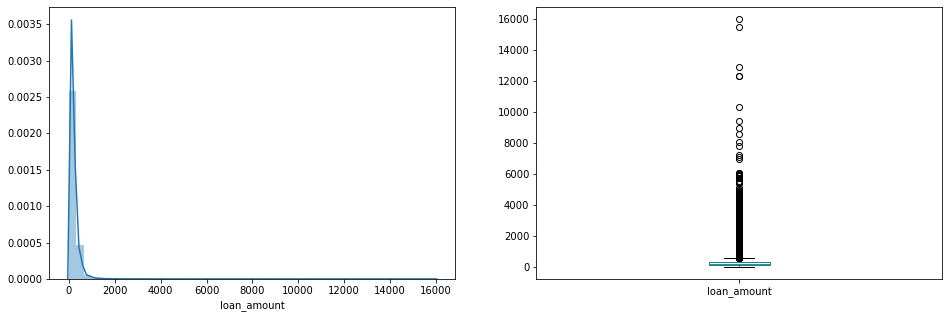

In [36]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train1['loan_amount']); 
plt.subplot(122)
train1['loan_amount'].plot.box(figsize=(16,5)) 
plt.show()

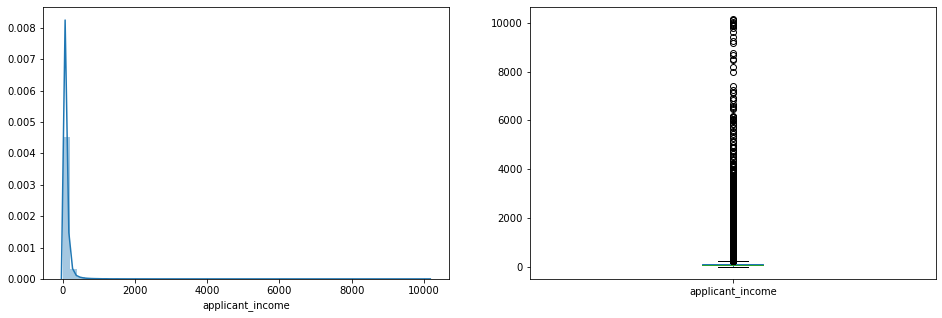

In [37]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train1['applicant_income']); 
plt.subplot(122)
train1['applicant_income'].plot.box(figsize=(16,5)) 
plt.show()

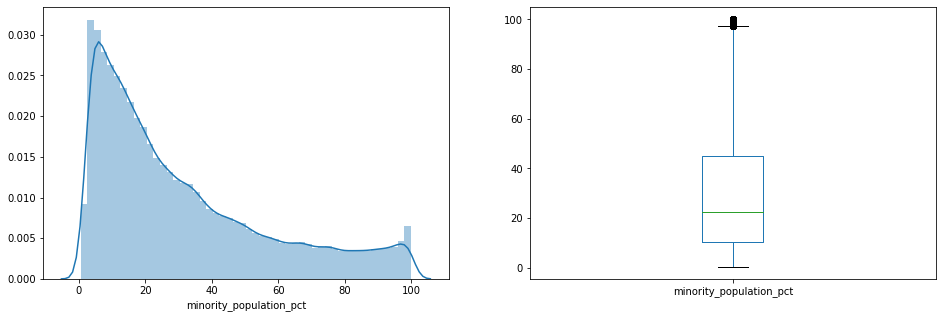

In [38]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train1['minority_population_pct']); 
plt.subplot(122)
train1['minority_population_pct'].plot.box(figsize=(16,5)) 
plt.show()

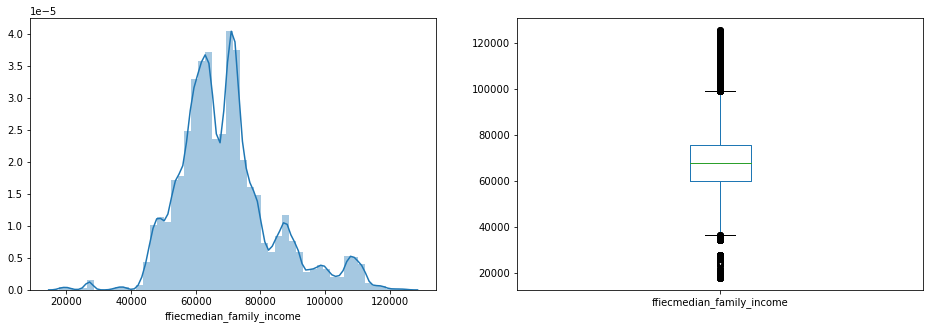

In [39]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train1['ffiecmedian_family_income']); 
plt.subplot(122)
train1['ffiecmedian_family_income'].plot.box(figsize=(16,5)) 
plt.show()

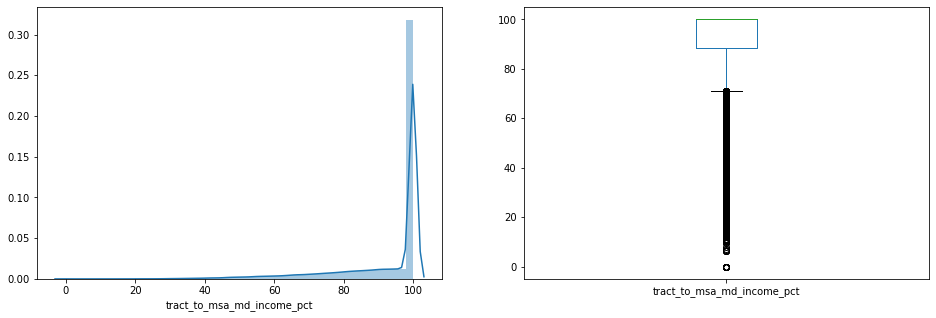

In [40]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train1['tract_to_msa_md_income_pct']); 
plt.subplot(122)
train1['tract_to_msa_md_income_pct'].plot.box(figsize=(16,5))  
plt.show()

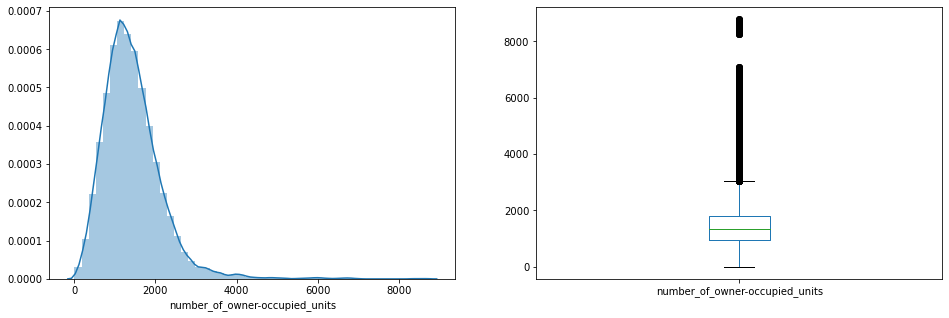

In [41]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train1['number_of_owner-occupied_units']); 
plt.subplot(122)
train1['number_of_owner-occupied_units'].plot.box(figsize=(16,5)) 
plt.show()

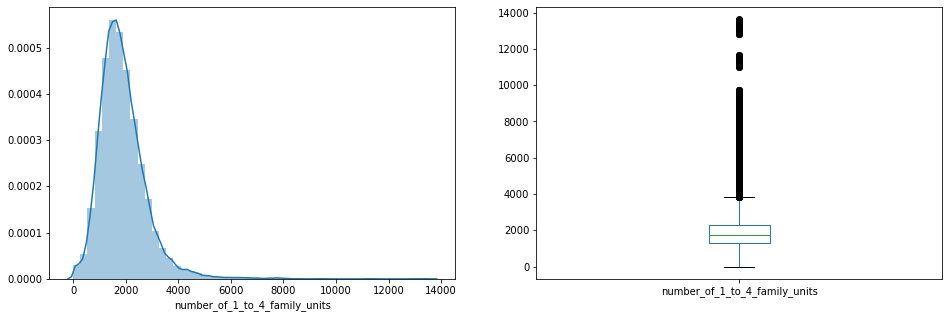

In [42]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train1['number_of_1_to_4_family_units']); 
plt.subplot(122)
train1['number_of_1_to_4_family_units'].plot.box(figsize=(16,5)) 
plt.show()

### Bivariate Analysis

#### Categorical Independent Variable vs Target Variable

<AxesSubplot:xlabel='loan_type'>

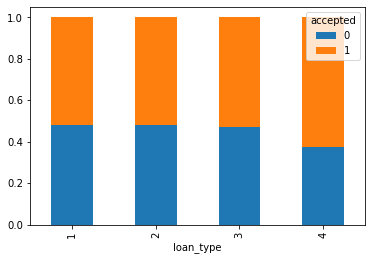

In [43]:
loan_type=pd.crosstab(train1['loan_type'],train1['accepted'])
loan_type.div(loan_type.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

<AxesSubplot:xlabel='property_type'>

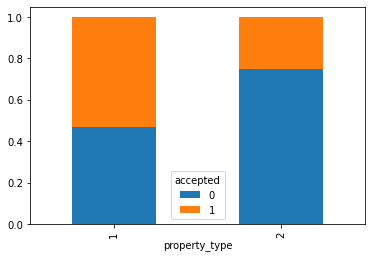

In [44]:
property_type=pd.crosstab(train1['property_type'],train1['accepted'])
property_type.div(property_type.sum(1).astype(float),
                  axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

<AxesSubplot:xlabel='occupancy'>

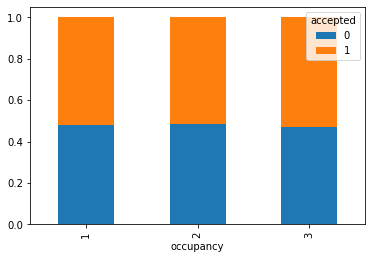

In [45]:
occupancy=pd.crosstab(train1['occupancy'],train1['accepted'])
occupancy.div(occupancy.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

<AxesSubplot:xlabel='loan_purpose'>

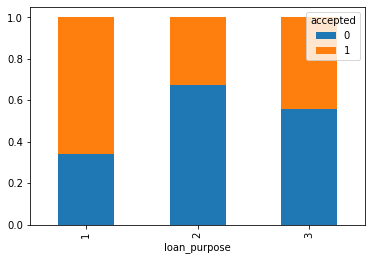

In [46]:
loan_purpose=pd.crosstab(train1['loan_purpose'],train1['accepted'])
loan_purpose.div(loan_purpose.sum(1).astype(float), 
                 axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

<AxesSubplot:xlabel='applicant_sex'>

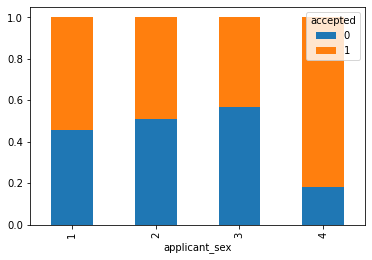

In [47]:
applicant_sex=pd.crosstab(train1['applicant_sex'],train1['accepted'])
applicant_sex.div(applicant_sex.sum(1).astype(float),
                  axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

<AxesSubplot:xlabel='applicant_race'>

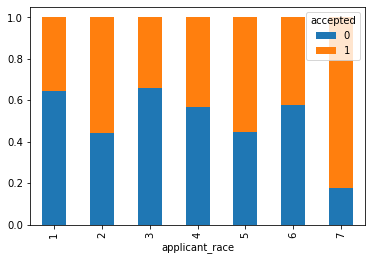

In [48]:
applicant_race=pd.crosstab(train1['applicant_race'],train1['accepted'])
applicant_race.div(applicant_race.sum(1).astype(float),
                   axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

<AxesSubplot:xlabel='preapproval'>

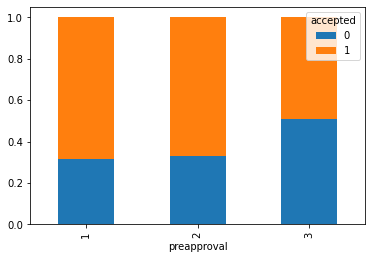

In [49]:
preapproval=pd.crosstab(train1['preapproval'],train1['accepted'])
preapproval.div(preapproval.sum(1).astype(float),
                axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

<AxesSubplot:xlabel='applicant_ethnicity'>

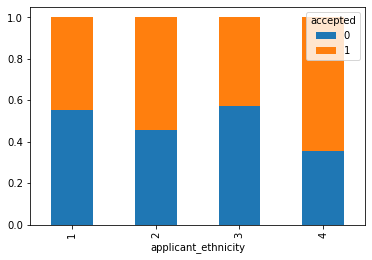

In [50]:
applicant_ethnicity=pd.crosstab(train1['applicant_ethnicity'],train1['accepted'])
applicant_ethnicity.div(applicant_ethnicity.sum(1).astype(float),
                        axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

### Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='accepted'>

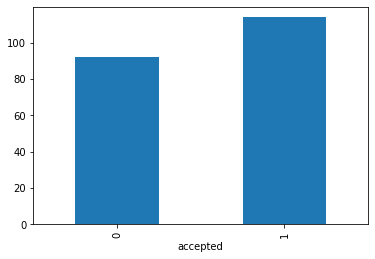

In [51]:
train1.groupby('accepted')['applicant_income'].mean().plot.bar()

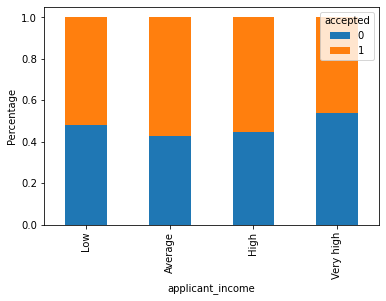

In [52]:
bins=[0,1500,4000,6000,10139] 
group=['Low','Average','High', 'Very high'] 

train1['Income_bin']=pd.cut(train1['applicant_income'],bins,labels=group)

Income_bin=pd.crosstab(train1['Income_bin'],train1['accepted'])

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('applicant_income') 
P = plt.ylabel('Percentage')

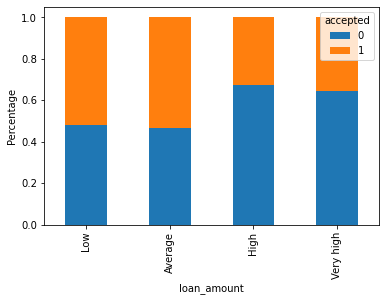

In [53]:
bins=[0,1500,4000,6000,15983] 
group=['Low','Average','High', 'Very high'] 

train1['loan_amount_bin']=pd.cut(train1['loan_amount'],bins,labels=group)

loan_amount_bin=pd.crosstab(train1['loan_amount_bin'],train1['accepted'])

loan_amount_bin.div(loan_amount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('loan_amount') 
P = plt.ylabel('Percentage')

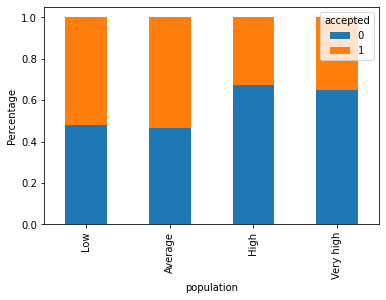

In [54]:
bins=[0,8000,15000,25000,40000] 
group=['Low','Average','High', 'Very high'] 

train1['population_pop_bin']=pd.cut(train1['population'],bins,labels=group)

population_pop_bin=pd.crosstab(train1['loan_amount_bin'],train1['accepted'])

population_pop_bin.div(population_pop_bin.sum(1).astype(float),
                       axis=0).plot(kind="bar", stacked=True)
plt.xlabel('population') 
P = plt.ylabel('Percentage')

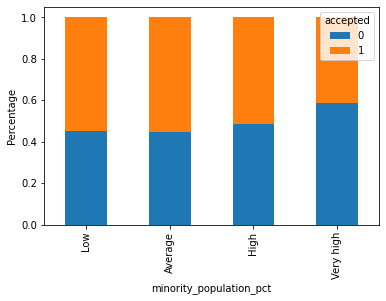

In [55]:
bins=[0,15,30,60,100] 
group=['Low','Average','High', 'Very high'] 

train1['min_pop_bin']=pd.cut(train1['minority_population_pct'],bins,labels=group)

Income_bin=pd.crosstab(train1['min_pop_bin'],train1['accepted'])

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('minority_population_pct') 
P = plt.ylabel('Percentage')

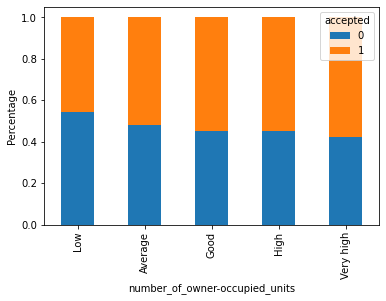

In [56]:
bins=[0,500, 2000,3500,5000,10000] 
group=['Low','Average','Good','High', 'Very high'] 

train1['num_own_bin']=pd.cut(train1['number_of_owner-occupied_units'],bins,labels=group)

Income_bin=pd.crosstab(train1['num_own_bin'],train1['accepted'])

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('number_of_owner-occupied_units') 
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

### Dummy Variables Creation

In [57]:
X = pd.get_dummies(X) 
train = pd.get_dummies(train) 

In [58]:
numfeat = ["loan_amount", "applicant_income", 
           "ffiecmedian_family_income",'population',
          'minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct',
        'number_of_owner-occupied_units','number_of_1_to_4_family_units']

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X[numfeat] = sc.fit_transform(X[numfeat])  

In [60]:
catfeatures_index = np.where(X.dtypes != float)[0]

### MODELLING 

In [61]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y,test_size=0.3)

In [62]:
catboost = CatBoostClassifier(iterations=100, depth=8, 
                              learning_rate=0.05,                           
                           eval_metric='Accuracy',use_best_model=True, random_seed=44624)

In [63]:
catboost.fit(X_train, y_train, cat_features = catfeatures_index, eval_set = (X_cv, y_cv)) #Model training


0:	learn: 0.6949943	test: 0.6928133	best: 0.6928133 (0)	total: 240ms	remaining: 23.8s
1:	learn: 0.7001829	test: 0.6992800	best: 0.6992800 (1)	total: 392ms	remaining: 19.2s
2:	learn: 0.7005857	test: 0.6986133	best: 0.6992800 (1)	total: 548ms	remaining: 17.7s
3:	learn: 0.7000086	test: 0.6990333	best: 0.6992800 (1)	total: 704ms	remaining: 16.9s
4:	learn: 0.7000971	test: 0.6989067	best: 0.6992800 (1)	total: 850ms	remaining: 16.1s
5:	learn: 0.7019086	test: 0.7006600	best: 0.7006600 (5)	total: 999ms	remaining: 15.6s
6:	learn: 0.7017400	test: 0.7000467	best: 0.7006600 (5)	total: 1.15s	remaining: 15.2s
7:	learn: 0.7017714	test: 0.7005733	best: 0.7006600 (5)	total: 1.29s	remaining: 14.8s
8:	learn: 0.7039629	test: 0.7025467	best: 0.7025467 (8)	total: 1.44s	remaining: 14.5s
9:	learn: 0.7032600	test: 0.7022600	best: 0.7025467 (8)	total: 1.6s	remaining: 14.4s
10:	learn: 0.7032657	test: 0.7021067	best: 0.7025467 (8)	total: 1.76s	remaining: 14.2s
11:	learn: 0.7044857	test: 0.7035067	best: 0.7035067 (

95:	learn: 0.7199743	test: 0.7178800	best: 0.7178800 (95)	total: 15.1s	remaining: 631ms
96:	learn: 0.7200600	test: 0.7179467	best: 0.7179467 (96)	total: 15.3s	remaining: 472ms
97:	learn: 0.7201686	test: 0.7178400	best: 0.7179467 (96)	total: 15.4s	remaining: 315ms
98:	learn: 0.7201629	test: 0.7179133	best: 0.7179467 (96)	total: 15.6s	remaining: 157ms
99:	learn: 0.7201914	test: 0.7178933	best: 0.7179467 (96)	total: 15.7s	remaining: 0us

bestTest = 0.7179466667
bestIteration = 96

Shrink model to first 97 iterations.


In [64]:
catboostpred = catboost.predict(X_cv)
catboostpredprobs = catboost.predict_proba(X_cv) # predicting probabilities

In [65]:
from sklearn.metrics import recall_score,confusion_matrix,precision_score, f1_score,roc_auc_score, roc_curve

In [66]:
print('The test accuracy is :{:.5f}'.format(accuracy_score(y_cv, catboostpred)))

the test accuracy is :0.71795


### Submission

catboost_submission=pd.read_csv("submission_format.csv")

catboost_submission['accepted'] = catboostpredprobs

catboost_submission.to_csv('mondcatboost_submission.csv', index = False)

### Performance Checking

In [72]:
print("Accuracy:",accuracy_score(catboostpred, y_cv)*100)
print()
print("Precision:",precision_score(catboostpred, y_cv)*100)
print()
#Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(catboostpred, y_cv)*100)
print()
print("f1 score",f1_score(catboostpred, y_cv)*100)
print()
print("confusion matrix",confusion_matrix(catboostpred, y_cv))

Accuracy: 72.19533333333334

Precision: 77.91859549887272

Recall: 69.89660371939398

f1 score 73.68992120917733

confusion matrix [[49886 16552]
 [25155 58407]]


### ROC

AUC: 0.797


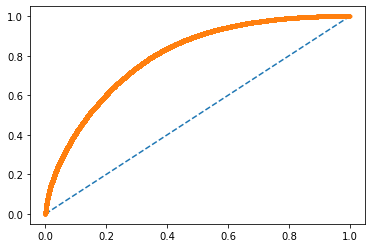

In [73]:
# keep probabilities for the positive outcome only
probs = catboostpredprobs[:, 1]
# calculate AUC
auc = roc_auc_score(y_cv, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_cv, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()